<a href="https://colab.research.google.com/github/aihtn2708/Time-Series-Forecasting-models/blob/main/Time_Series_Forecasting_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
file_path = 'international_airline_passengers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


      time  passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [8]:
df.set_index('time', inplace=True)

In [17]:
import matplotlib.pyplot as plt

def plot_forecast(train, test, forecast, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['passengers'], label='Train')
    plt.plot(test.index, test['passengers'], label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.legend(loc='upper left')
    plt.title(f'{model_name} Forecast')
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


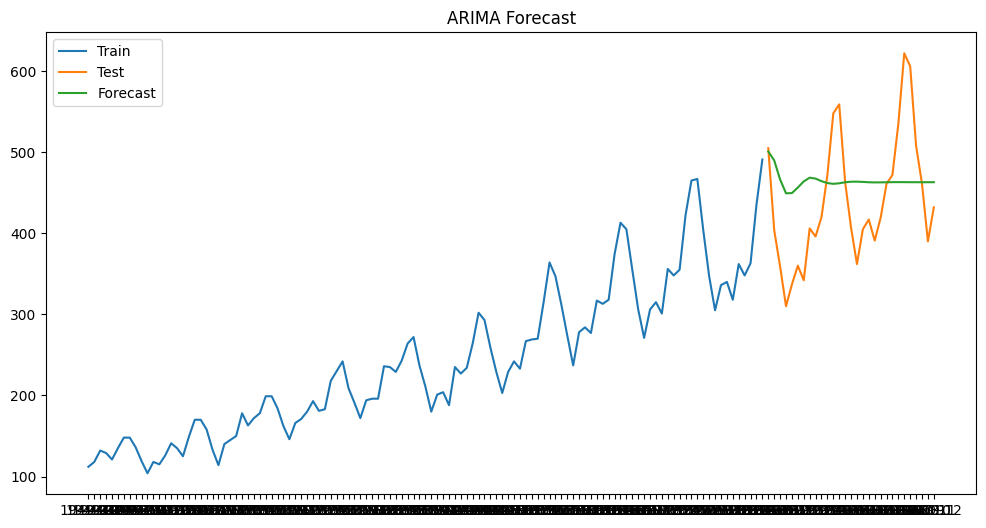

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit the ARIMA model
model_arima = ARIMA(train['passengers'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(test))

# Plot ARIMA results
plot_forecast(train, test, forecast_arima, 'ARIMA')


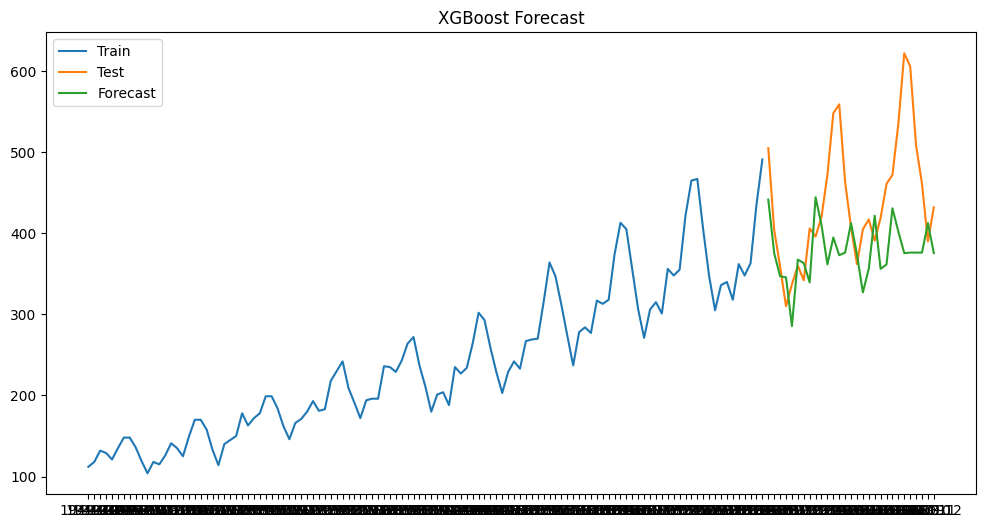

In [20]:
from xgboost import XGBRegressor

# Create lag features
def create_lag_features(data, lags=3):
    for lag in range(1, lags+1):
        data[f'lag_{lag}'] = data['passengers'].shift(lag)
    return data

df_lag = create_lag_features(df.copy(), lags=3).dropna()

# Adjust the train_size for lagged data
adjusted_train_size = train_size - 3

# Split the data into training and testing sets for XGBoost
train_lag, test_lag = df_lag.iloc[:adjusted_train_size], df_lag.iloc[adjusted_train_size:]
X_train_lag, y_train_lag = train_lag.drop('passengers', axis=1), train_lag['passengers']
X_test_lag, y_test_lag = test_lag.drop('passengers', axis=1), test_lag['passengers']

# Fit the XGBoost model
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train_lag, y_train_lag)
forecast_xgb = model_xgb.predict(X_test_lag)

# Plot XGBoost results
plot_forecast(train, test, forecast_xgb, 'XGBoost')

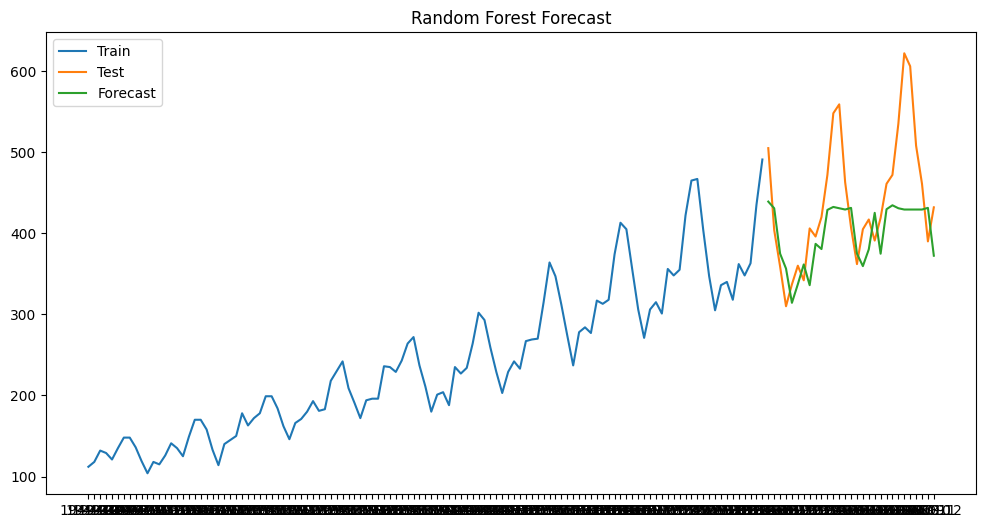

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Fit the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=3)
model_rf.fit(X_train_lag, y_train_lag)
forecast_rf = model_rf.predict(X_test_lag)

# Plot Random Forest results
plot_forecast(train, test, forecast_rf, 'Random Forest')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


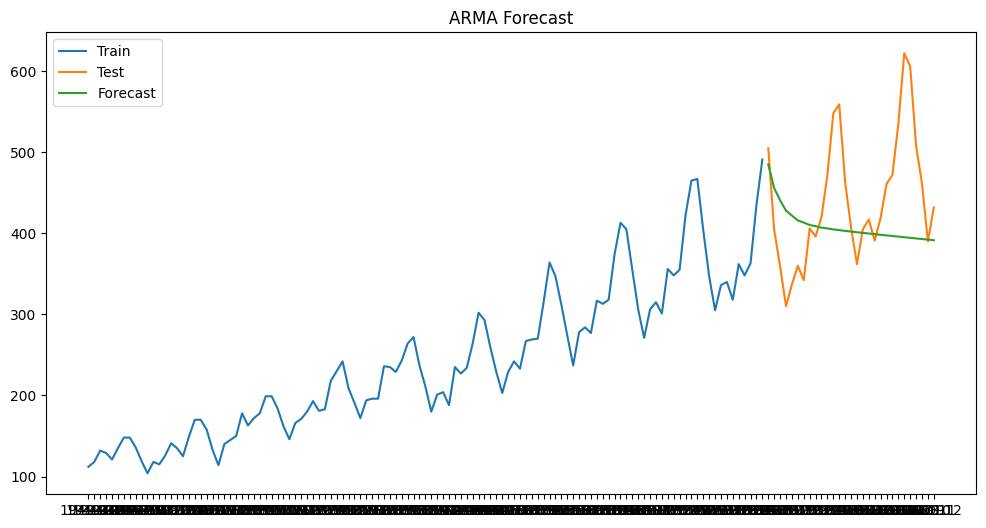

In [22]:
# Fit the ARMA model
model_arma = ARIMA(train['passengers'], order=(3, 0, 3))
model_fit_arma = model_arma.fit()
forecast_arma = model_fit_arma.forecast(steps=len(test))

# Plot ARMA results
plot_forecast(train, test, forecast_arma, 'ARMA')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0414
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0101
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054
Epoch 12/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068
Epoch 13/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046
Epoch 14/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037
Epoch 15/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

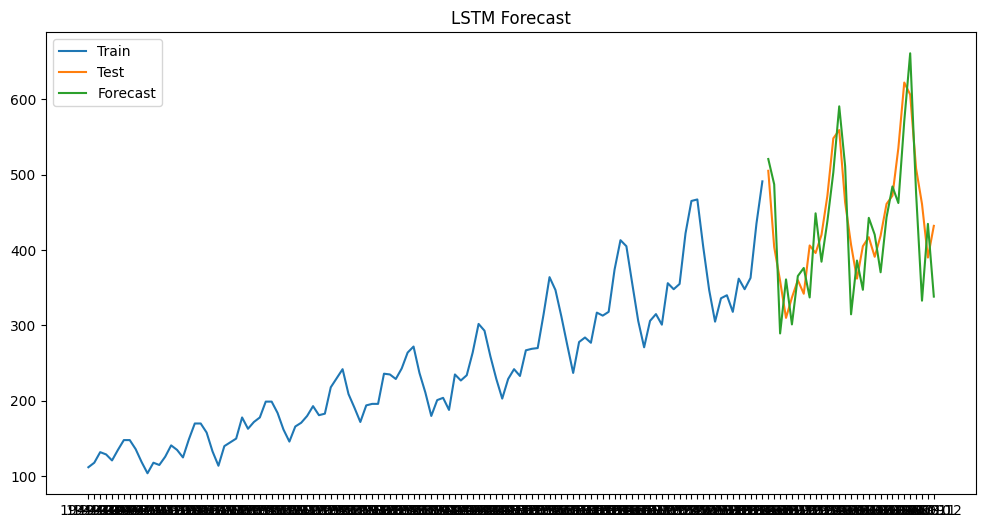

In [23]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['passengers'].values.reshape(-1, 1))

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

# Adjust the train_size for LSTM data
adjusted_train_size = train_size - seq_length

X_train, X_test = X[:adjusted_train_size], X[adjusted_train_size:]
y_train, y_test = y[:adjusted_train_size], y[adjusted_train_size:]

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, batch_size=1, epochs=50)

# Make predictions
predictions = model_lstm.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot LSTM results
plot_forecast(train, test, predictions, 'LSTM')

In [24]:
def calculate_rmse(test, forecast):
    return np.sqrt(mean_squared_error(test, forecast))

In [27]:
rmse_arima = calculate_rmse(test['passengers'], forecast_arima)
rmse_xgb = calculate_rmse(y_test_lag, forecast_xgb)
rmse_rf = calculate_rmse(y_test_lag, forecast_rf)
rmse_arma = calculate_rmse(test['passengers'], forecast_arma)
rmse_lstm = calculate_rmse(y_test, predictions)
# Summarize the RMSE values for each model
rmse_values = {
    'ARIMA': rmse_arima,
    'XGBoost': rmse_xgb,
    'Random Forest': rmse_rf,
    'ARMA': rmse_arma,
    'LSTM': rmse_lstm
}

# Print the summary of RMSE values
for model, rmse in rmse_values.items():
    print(f'{model} RMSE: {rmse}')


ARIMA RMSE: 80.66394528577948
XGBoost RMSE: 98.26160415445861
Random Forest RMSE: 71.81738047766832
ARMA RMSE: 90.77897343944576
LSTM RMSE: 55.17014571648865
